# Prediction using Supervised ML:-

### By:- Samyak Jain

 #### Problem Statement:- What will be predicted score if a student studies for 9.25 hrs/ day?
 #### Solution:- We are gonna used linear regression technique to predict the score.

In [2]:
import numpy as np     #for arays and maths manupulation
import pandas as pd    #for dataframes

#For graphs and visualization

import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [4]:
## importing data using pandas

df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Shape of the dataset: ",df.shape)
df.head() #5 tail dataframe


Shape of the dataset:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
## To check the null values in dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
## Checking Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
## Checking stats of dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## VISUALIZATION

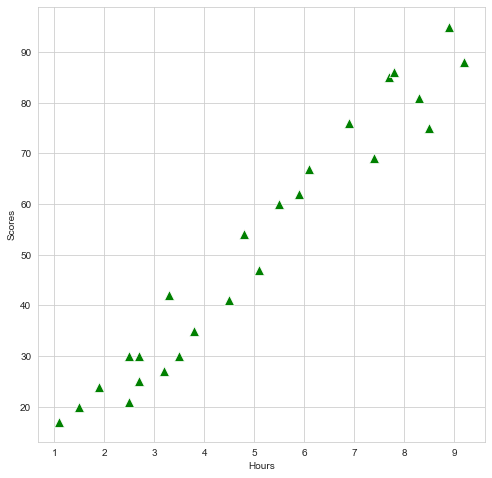

In [45]:
#As we can see there is no null values in our data set so we see the graphs 
#As we can see the data is continious data so we are gonna use the scatter plot to see the trnd in data
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.scatterplot(data=df, x="Hours", y="Scores",color='green',marker='^',s=100)



- From this graph we clearly sees that, as thr no of hours incrases the score of student increases. So this shows the positive regression relationship.

- And we can also see that there is no outliers which impact the model.

## Model Training 

In [18]:
##Now we will devide the dependent and independent data from the dataset.

#we will use iloc function to extract the columns values in ndarray form

df_hours = df.iloc[:,:1].values #independet variable
df_scores = df.iloc[:,1].values #dependent variable

In [19]:
from sklearn.model_selection import train_test_split  
X_train, x_test, Y_train, y_test = train_test_split(df_hours, df_scores, 
                            test_size=0.3, random_state=0) 

In [20]:
from sklearn.linear_model import LinearRegression
obj = LinearRegression()
obj.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Making Prediction 

In [21]:
y_pred = obj.predict(x_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [22]:
#Comparing y actuala nd y predicted
df_new = pd.DataFrame({'actual':y_test,'Predicted':y_pred})
print(df_new)

   actual  Predicted
0      20  17.053665
1      27  33.694229
2      69  74.806209
3      30  26.842232
4      62  60.123359
5      35  39.567369
6      24  20.969092
7      86  78.721636


# Now we will plot the regression line with the train data

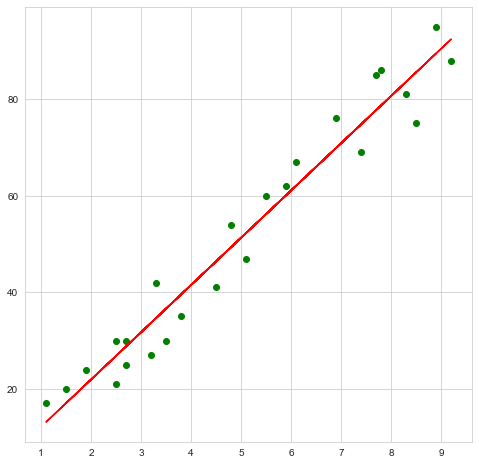

In [35]:
#Plotting regression line
#line => y=mx + c
line  = obj.coef_*df_hours + obj.intercept_


#Plotting x values
plt.figure(figsize=(8,8))
plt.scatter(df_hours,df_scores,color='green')
plt.plot(df_hours, line, color='red')
plt.show()

## Now we are gonna check for required value i.e., 9.25 

In [33]:
hrs = [[9.25]]
y_pred1 = obj.predict(hrs)
print("Given Time {}".format(hrs[0][0]))
print("Predicted Score:{}".format(y_pred1[0]))

Given Time 9.25
Predicted Score:92.91505723477057


#### Let's Check the model error value

In [31]:
from sklearn import metrics
import math

print('R2 score:',metrics.r2_score(y_test, y_pred))
#In Case of R-SQUARED, it has values between 0 and 1 for every single regression.
#Where values between 0.3 and 0.5 refer to a weak r-squared, 0.5 and 0.7 refers to a moderate r-squared,
#and values > 0.7 refer to a strong r-squared.
#The higher the r-squared, the better the model fits your data.


print('RMSE score:',math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#is considered the best statistics to determine the relationship between the model and the response variable.
#Represents 1-Standard Deviation (residuals) between the actual value and the predicted values.
#It measures the spread of the data points from the regression line"""

R2 score: 0.9568211104435258
RMSE score: 4.792191274636314
